## Business Problem Statement:

#### Analyze the Company dataset to generate insights that could help Streaming_Service_Platform decide which type of shows/movies to produce and how they can grow the business in different countries.

## To Do:

- Define problem statement and analyze basic metrics.
- Observe the shape of data, data types of all attributes, and handle missing values.
- Perform non-graphical analysis: value counts and unique attributes.
Perform visual analysis - Univariate, Bivariate after pre-processing of the data.
- Check for missing values and outliers (treatment optional).
- Draw insights based on non-graphical and visual analysis.
- Provide business insights and give recommendations.

## Dataset columns:

- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

## Importing required Libraries and Dataset:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("streaming_service_raw_data.csv")
df_original = df.copy()

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


#### Dropping the unique row number identifier column "show_id". Also dropping the column "description" from dataframe as we can not generate useful insights using this column in this case study.

In [10]:
df.drop(columns=["show_id", "description"], inplace=True)

In [11]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [12]:
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"
8806,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


## Basic Statistical Summary of Dataset:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [14]:
df.describe(include="all")

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
count,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807
unique,2,8807,4528,7692,748,1767,NaN,17,220,514
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,6131,1,19,19,2818,109,NaN,3207,1793,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [15]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [16]:
df.shape

(8807, 10)

#### Currently we have 8807 entries in the dataset with 10 features, which can be considered a relatively good dataset size.

## Checking datatypes of columns in Dataset:

In [17]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

## Updating datatypes of some columns in Dataset:

In [18]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [19]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [20]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

#### There is no need to update the names of columns in Dataset.

## Checking for duplicate values in columns:

In [21]:
duplicate_data = df[df.duplicated()]
duplicate_data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


#### There are no duplicate rows in the dataset.

## Checking for unique values in columns:

In [22]:
df.nunique()

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
dtype: int64

## Checking for null values in columns:

In [23]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

### Calculate the percentage of missing values in columns:

In [24]:
print(f"Column Name  : Missing Value in %")
print("-"*35)
for col in df.columns.tolist():
    if df[col].isna().sum() > 0:
        print(f"{col:<12} : {(round((((df[col].isna().sum()) / df.shape[0]) * 100), 2)):0>5} %")
print("-"*35)

Column Name  : Missing Value in %
-----------------------------------
director     : 29.91 %
cast         : 09.37 %
country      : 09.44 %
date_added   : 00.11 %
rating       : 00.05 %
duration     : 00.03 %
-----------------------------------


In [25]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [26]:
cat_cols = ["type", "country", "release_year", "rating", "duration"]

for col in cat_cols:
    print("\n")
    print(f"Column Name: {col}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Unique Values Percentage in Column {col}:\n")
    print((df[col].value_counts(normalize=True)*100).round(2))
    print("\n")



Column Name: type
Number of Unique Values: 2
Unique Values Percentage in Column type:

Movie      69.62
TV Show    30.38
Name: type, dtype: float64




Column Name: country
Number of Unique Values: 748
Unique Values Percentage in Column country:

United States                             35.33
India                                     12.19
United Kingdom                             5.25
Japan                                      3.07
South Korea                                2.49
                                          ...  
Romania, Bulgaria, Hungary                 0.01
Uruguay, Guatemala                         0.01
France, Senegal, Belgium                   0.01
Mexico, United States, Spain, Colombia     0.01
United Arab Emirates, Jordan               0.01
Name: country, Length: 748, dtype: float64




Column Name: release_year
Number of Unique Values: 74
Unique Values Percentage in Column release_year:

2018    13.02
2017    11.72
2019    11.70
2020    10.82
2016    10.24
  

## Challanges in data pre-processing of dataframe:

1. Normalize the DataFrame to un-nest data:
  - Use split and stack methods for the columns director, cast, country, and listed_in to separate multiple values.
  - Join the separate DataFrames together, then merge the final DataFrame with the original DataFrame using the title column to combine the data.
  - Remove duplicate columns from the original DataFrame df.

2. Deal with NaN values:
  - For categorical values, use mode imputation to fill missing data.
  - For numerical values, use median imputation to fill missing data.

3. Remove rows with mismatched values:
  - For example, delete rows with incorrect values in the rating column.
  - Remove duplicate rows from the DataFrame.


### 1. Normalize the DataFrame to un-nest data:
  - Use split and stack methods for the columns director, cast, country, and listed_in to separate multiple values.
  - Join the separate DataFrames together, then merge the final DataFrame with the original DataFrame using the title column to combine the data.
  - Remove duplicate columns from the original DataFrame df.


#### Use `split` and `stack` for column `director` and create `df_director`:

In [27]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [28]:
list_director = df["director"].apply(lambda x: str(x).split(", ")).tolist()

In [29]:
df_director = pd.DataFrame(list_director, index = df["title"])

In [30]:
df_director = df_director.stack()

In [31]:
df_director = pd.DataFrame(df_director)

In [32]:
df_director.reset_index(inplace= True)

In [33]:
df_director = df_director[["title", 0]]

In [34]:
df_director.rename(columns = {0: "director"}, inplace = True)

In [35]:
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


#### Use `split` and `stack` for column `cast` and create `df_cast`:

In [36]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [37]:
list_cast = df["cast"].apply(lambda x: str(x).split(", ")).tolist()

In [38]:
df_cast = pd.DataFrame(list_cast, index=df["title"])

In [39]:
df_cast = df_cast.stack()

In [40]:
df_cast=pd.DataFrame(df_cast)

In [41]:
df_cast.reset_index(inplace=True)

In [42]:
df_cast = df_cast[["title", 0]]

In [43]:
df_cast.rename(columns = {0: 'cast'}, inplace = True)

In [44]:
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


#### Use `split` and `stack` for column `country` and create `df_country`:

In [45]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [46]:
list_country = df["country"].apply(lambda x: str(x).split(", ")).tolist()

In [47]:
df_country = pd.DataFrame(list_country, index = df["title"])

In [48]:
df_country = df_country.stack()

In [49]:
df_country = pd.DataFrame(df_country)

In [50]:
df_country.reset_index(inplace = True)

In [51]:
df_country = df_country[["title", 0]]

In [52]:
df_country.rename(columns = {0: "country"}, inplace = True)

In [53]:
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


#### Use `split` and `stack` for column `list_listed` and create `df_listed_in`:

In [54]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [55]:
list_listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()

In [56]:
df_listed_in = pd.DataFrame(list_listed_in, index=df["title"])

In [57]:
df_listed_in = df_listed_in.stack()

In [58]:
df_listed_in = pd.DataFrame(df_listed_in)

In [59]:
df_listed_in.reset_index(inplace= True)

In [60]:
df_listed_in = df_listed_in[["title", 0]]

In [61]:
df_listed_in.rename(columns = {0: "listed_in"}, inplace= True)

In [62]:
df_listed_in.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


#### Merge the normalised dataframe `df_director` with normalised dataframe `df_cast` on column `title` to get whole data:

In [63]:
first_merge_df = pd.merge(df_director, df_cast, how='inner', on="title")
first_merge_df.head()

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba


#### Merge the dataframe `first_merge_df` with normalised dataframe `df_country` on column `title` to get whole data:

In [64]:
second_merge_df = pd.merge(first_merge_df, df_country, how='inner', on="title")
second_merge_df.head()

,title,director,cast,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States
1,Blood & Water,nan,Ama Qamata,South Africa
2,Blood & Water,nan,Khosi Ngema,South Africa
3,Blood & Water,nan,Gail Mabalane,South Africa
4,Blood & Water,nan,Thabang Molaba,South Africa


#### Merge the dataframe `second_merge_df` with normalised dataframe `df_listed_in` on column `title` to get whole data:

In [65]:
third_merge_df = pd.merge(second_merge_df, df_listed_in, how='inner', on="title")
third_merge_df.head()

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows


#### Merge the dataframe `third_merge_df` with orginal dataframe `df` on column `title` to get whole data:

In [66]:
final_merge_df = pd.merge(df, third_merge_df, how='inner', on="title")
final_merge_df.drop(columns=["director_x", "cast_x", "country_x", "listed_in_x"], inplace = True)
final_merge_df.rename(columns = {"director_y" : "director", "cast_y" : "cast", "country_y" : "country", "listed_in_y" : "listed_in"}, inplace = True)
final_merge_df.head(50)

,type,title,date_added,release_year,rating,duration,director,cast,country,listed_in
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Kirsten Johnson,nan,United States,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Khosi Ngema,South Africa,TV Dramas
6,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Khosi Ngema,South Africa,TV Mysteries
7,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Gail Mabalane,South Africa,International TV Shows
8,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Gail Mabalane,South Africa,TV Dramas
9,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,nan,Gail Mabalane,South Africa,TV Mysteries


In [67]:
final_merge_df.replace(to_replace=["nan"], value=[np.nan], inplace=True)

In [68]:
df.columns.tolist()

['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [69]:
df_clean = final_merge_df[df.columns.tolist()]
df_clean.head(50)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
5,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
6,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
7,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
8,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
9,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries


In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          201991 non-null  object        
 1   title         201991 non-null  object        
 2   director      151348 non-null  object        
 3   cast          199845 non-null  object        
 4   country       190094 non-null  object        
 5   date_added    201833 non-null  datetime64[ns]
 6   release_year  201991 non-null  int64         
 7   rating        201924 non-null  object        
 8   duration      201988 non-null  object        
 9   listed_in     201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 17.0+ MB


In [71]:
df_clean.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


In [72]:
df_clean.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
201986,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies
201987,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals
201988,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas
201989,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies
201990,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Music & Musicals


In [73]:
df_clean.shape

(201991, 10)

### 2. Deal with NaN values:
   - Add new column `year_added` to `df_clean` dataframe.
   - For categorical values, use mode imputation to fill missing data.
   - For numerical values, use median imputation to fill missing data.

#### Add new column year_added to df_clean dataframe.

In [74]:
df_clean.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


In [75]:
df_clean["year_added"] = df_clean["date_added"].dt.year

In [76]:
df_clean["year_added"] = df_clean["year_added"].fillna(df_clean["year_added"].median())
df_clean["year_added"] = df_clean["year_added"].astype(np.int64)

In [77]:
df_clean.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021
2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,2021
3,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,2021
4,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021


In [78]:
df_clean.columns.tolist()

['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'year_added']

In [79]:
df_clean = df_clean[['type', 'title', 'director', 'cast', 'country', 'date_added', 'year_added', 'release_year', 'rating', 'duration', 'listed_in']]

In [80]:
df_clean.head()

,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2021,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas
3,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Mysteries
4,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows


In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          201991 non-null  object        
 1   title         201991 non-null  object        
 2   director      151348 non-null  object        
 3   cast          199845 non-null  object        
 4   country       190094 non-null  object        
 5   date_added    201833 non-null  datetime64[ns]
 6   year_added    201991 non-null  int64         
 7   release_year  201991 non-null  int64         
 8   rating        201924 non-null  object        
 9   duration      201988 non-null  object        
 10  listed_in     201991 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 18.5+ MB


### 2. Deal with NaN values:
   - For categorical values, use mode imputation to fill missing data.
   - For numerical values, use median imputation to fill missing data.

In [82]:
df_clean.isna().sum()

type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
year_added          0
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

#### Get percentage of missing values in columns of `df_clean`

In [83]:
print(f"Column Name  : Missing Value in %")
print("-"*35)
for col in df_clean.columns.tolist():
    if df_clean[col].isna().sum() > 0:
        print(f"{col:<12} : {(round((((df_clean[col].isna().sum()) / df_clean.shape[0]) * 100), 2)):0>5} %")
print("-"*35)

Column Name  : Missing Value in %
-----------------------------------
director     : 25.07 %
cast         : 01.06 %
country      : 05.89 %
date_added   : 00.08 %
rating       : 00.03 %
duration     : 000.0 %
-----------------------------------


#### We have chosen to use 'Not Available' as the imputation value for the 'director' column since 25% of the rows are missing this information. In this context, employing mode-based imputation may not be appropriate or effective, as it could lead to an inaccurate representation of the underlying data.

In [84]:
df_clean["director"].fillna('Not Available', inplace = True)

In [85]:
df_clean.isna().sum()

type                0
title               0
director            0
cast             2146
country         11897
date_added        158
year_added          0
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

#### We have chosen to use 'Not Available' as the imputation value for the 'country' column since 5% of the rows are missing this information. In this context, employing mode-based imputation may not be appropriate or effective, as it could lead to an inaccurate representation of the underlying data.

In [86]:
df_clean["country"].fillna('Not Available', inplace = True)

In [87]:
df_clean.isna().sum()

type               0
title              0
director           0
cast            2146
country            0
date_added       158
year_added         0
release_year       0
rating            67
duration           3
listed_in          0
dtype: int64

### 3. Remove rows with mismatched values:
  - For example, delete rows with incorrect values in the rating column.
  - Remove duplicate rows from the DataFrame.

#### Get percentage of missing values in the columns of dataframe `df_clean`:

In [88]:
print(f"Column Name  : Missing Value in %")
print("-"*35)
for col in df_clean.columns.tolist():
    if df_clean[col].isna().sum() > 0:
        print(f"{col:<12} : {(round((((df_clean[col].isna().sum()) / df_clean.shape[0]) * 100), 2)):0>5} %")
print("-"*35)

Column Name  : Missing Value in %
-----------------------------------
cast         : 01.06 %
date_added   : 00.08 %
rating       : 00.03 %
duration     : 000.0 %
-----------------------------------


#### Less than 3% of the rows have missing values in the cast, date_added, rating, and duration columns. To maintain data integrity, we will remove rows with NaN values in these columns.

In [89]:
df_clean = df_clean[df_clean["cast"].notna()]
df_clean = df_clean[df_clean["date_added"].notna()]
df_clean = df_clean[df_clean["rating"].notna()]
df_clean = df_clean[df_clean["duration"].notna()]

In [90]:
df_clean.reset_index(inplace= True)

In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199617 entries, 0 to 199616
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         199617 non-null  int64         
 1   type          199617 non-null  object        
 2   title         199617 non-null  object        
 3   director      199617 non-null  object        
 4   cast          199617 non-null  object        
 5   country       199617 non-null  object        
 6   date_added    199617 non-null  datetime64[ns]
 7   year_added    199617 non-null  int64         
 8   release_year  199617 non-null  int64         
 9   rating        199617 non-null  object        
 10  duration      199617 non-null  object        
 11  listed_in     199617 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 18.3+ MB


In [92]:
df_clean.drop(['index'], axis=1, inplace=True)

In [93]:
df_clean.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
year_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [94]:
df_clean["rating"].value_counts()

TV-MA       72945
TV-14       43332
R           25843
PG-13       16201
TV-PG       14545
PG          10905
TV-Y7        6247
TV-Y         3607
TV-G         2674
G            1528
NR           1475
NC-17         149
UR             86
TV-Y7-FV       80
Name: rating, dtype: int64

#### Drop the duplicate rows from dataframe `df_clean`:

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199617 entries, 0 to 199616
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          199617 non-null  object        
 1   title         199617 non-null  object        
 2   director      199617 non-null  object        
 3   cast          199617 non-null  object        
 4   country       199617 non-null  object        
 5   date_added    199617 non-null  datetime64[ns]
 6   year_added    199617 non-null  int64         
 7   release_year  199617 non-null  int64         
 8   rating        199617 non-null  object        
 9   duration      199617 non-null  object        
 10  listed_in     199617 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 16.8+ MB


In [96]:
df_clean.shape

(199617, 11)

In [97]:
df_clean.drop_duplicates(keep="first", inplace=True)

In [98]:
df_clean.reset_index(inplace= True)

In [99]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199562 entries, 0 to 199561
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         199562 non-null  int64         
 1   type          199562 non-null  object        
 2   title         199562 non-null  object        
 3   director      199562 non-null  object        
 4   cast          199562 non-null  object        
 5   country       199562 non-null  object        
 6   date_added    199562 non-null  datetime64[ns]
 7   year_added    199562 non-null  int64         
 8   release_year  199562 non-null  int64         
 9   rating        199562 non-null  object        
 10  duration      199562 non-null  object        
 11  listed_in     199562 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 18.3+ MB


In [100]:
df_clean.shape

(199562, 12)

In [101]:
df_clean.drop(['index'], axis=1, inplace=True)

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199562 entries, 0 to 199561
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          199562 non-null  object        
 1   title         199562 non-null  object        
 2   director      199562 non-null  object        
 3   cast          199562 non-null  object        
 4   country       199562 non-null  object        
 5   date_added    199562 non-null  datetime64[ns]
 6   year_added    199562 non-null  int64         
 7   release_year  199562 non-null  int64         
 8   rating        199562 non-null  object        
 9   duration      199562 non-null  object        
 10  listed_in     199562 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 16.7+ MB


In [103]:
df_clean.head()

,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
1,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas
2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Mysteries
3,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
4,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas


#### Create deep copy `df_final` from `df_clean`, which will be used for visualization.

In [105]:
df_final = df_clean.copy()

In [106]:
df_final.head()

,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
1,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas
2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Mysteries
3,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
4,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas


In [109]:
df_final.columns.tolist()

['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'year_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [110]:
def process_duration_column(df, column_name):
    # Create empty columns for duration_minutes and duration_seasons
    df['duration_minutes'] = -1
    df['duration_seasons'] = -1

    # Iterate through the rows in the DataFrame
    for index, row in df.iterrows():
        value = str(row[column_name]).lower()
        
        # Check if the value contains 'min' or 'seasons' (ignoring case)
        if 'min' in value:
            # Extract the number and store it in the duration_minutes column
            df.at[index, 'duration_minutes'] = int(''.join(filter(str.isdigit, value)))
        elif 'seasons' in value:
            # Extract the number and store it in the duration_seasons column
            df.at[index, 'duration_seasons'] = int(''.join(filter(str.isdigit, value)))

    # Delete the original column
    df = df.drop(column_name, axis=1)

    return df

In [111]:
df_final = process_duration_column(df_final, 'duration')

In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199562 entries, 0 to 199561
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   type              199562 non-null  object        
 1   title             199562 non-null  object        
 2   director          199562 non-null  object        
 3   cast              199562 non-null  object        
 4   country           199562 non-null  object        
 5   date_added        199562 non-null  datetime64[ns]
 6   year_added        199562 non-null  int64         
 7   release_year      199562 non-null  int64         
 8   rating            199562 non-null  object        
 9   listed_in         199562 non-null  object        
 10  duration_minutes  199562 non-null  int64         
 11  duration_seasons  199562 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 18.3+ MB


In [113]:
df_final.shape

(199562, 12)

In [114]:
df_final.head()

,type,title,director,cast,country,date_added,year_added,release_year,rating,listed_in,duration_minutes,duration_seasons
0,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
1,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2
2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Mysteries,-1,2
3,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
4,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2


In [115]:
df_final.tail()

,type,title,director,cast,country,date_added,year_added,release_year,rating,listed_in,duration_minutes,duration_seasons
199557,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019,2015,TV-14,International Movies,111,-1
199558,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019,2015,TV-14,Music & Musicals,111,-1
199559,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,Dramas,111,-1
199560,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,International Movies,111,-1
199561,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,Music & Musicals,111,-1


In [116]:
df_final.describe(include="all")

,type,title,director,cast,country,date_added,year_added,release_year,rating,listed_in,duration_minutes,duration_seasons
count,199562,199562,199562,199562,199562,199562,199562.000000,199562.000000,199562,199562,199562.000000,199562.000000
unique,2,7965,4528,36392,120,1663,NaN,NaN,14,42,NaN,NaN
top,Movie,Kahlil Gibran's The Prophet,Not Available,Liam Neeson,United States,2020-01-01 00:00:00,NaN,NaN,TV-MA,Dramas,NaN,NaN
freq,144448,700,49687,161,58495,3733,NaN,NaN,72897,29736,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2018.969298,2013.421132,NaN,NaN,77.242787,-0.535027
std,NaN,NaN,NaN,NaN,NaN,NaN,1.550009,9.008441,NaN,NaN,52.658881,1.535002
min,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,1942.000000,NaN,NaN,-1.000000,-1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,2012.000000,NaN,NaN,-1.000000,-1.000000


In [117]:
df_final.nunique()

type                    2
title                7965
director             4528
cast                36392
country               120
date_added           1663
year_added             14
release_year           72
rating                 14
listed_in              42
duration_minutes      202
duration_seasons       15
dtype: int64

In [118]:
cat_cols = df_final.columns.tolist()

for col in cat_cols:
    print("\n")
    print(f"Column Name: {col}")
    print(f"Number of Unique Values: {df_final[col].nunique()}")
    print(f"Unique Values Percentage in Column (Top 10) {col}:\n")
    print((df_final[col].value_counts(normalize=True)*100).head(10).round(2))
    if df_final[col].nunique() < 500: 
      print(f"Unique Values in Column: {df_final[col].unique()}")
    print("\n")



Column Name: type
Number of Unique Values: 2
Unique Values Percentage in Column (Top 10) type:

Movie      72.38
TV Show    27.62
Name: type, dtype: float64
Unique Values in Column: ['TV Show' 'Movie']




Column Name: title
Number of Unique Values: 7965
Unique Values Percentage in Column (Top 10) title:

Kahlil Gibran's The Prophet    0.35
Holidays                       0.25
Movie 43                       0.23
The Eddy                       0.21
Narcos                         0.19
Cloud Atlas                    0.18
Sincerely Yours, Dhaka         0.17
Kon-Tiki                       0.15
Olmo & the Seagull             0.15
HALO Legends                   0.14
Name: title, dtype: float64




Column Name: director
Number of Unique Values: 4528
Unique Values Percentage in Column (Top 10) director:

Not Available          24.90
Martin Scorsese         0.21
Youssef Chahine         0.20
Cathy Garcia-Molina     0.18
Steven Spielberg        0.18
Lars von Trier          0.17
Raja Gosnell      

In [117]:
df_final["director"].value_counts().head(20) 

Not Available          49687
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Lars von Trier           336
Raja Gosnell             308
Tom Hooper               306
McG                      293
David Dhawan             270
Wilson Yip               260
Don Michael Paul         255
Martin Campbell          248
Noah Baumbach            242
Olivier Assayas          240
Anurag Kashyap           234
Yorgos Lanthimos         231
Umesh Mehra              228
Yılmaz Erdoğan           227
Lana Wachowski           226
Name: director, dtype: int64

In [119]:
df_final["country"].value_counts().head(20)

United States     58495
India             22717
United Kingdom    12693
Not Available     11578
Japan              8575
France             8170
Canada             7849
Spain              5249
South Korea        5035
Germany            4335
Mexico             3905
China              3309
Turkey             2714
Australia          2554
Nigeria            2446
Hong Kong          2355
Egypt              2313
Indonesia          2121
Taiwan             2102
Belgium            2031
Name: country, dtype: int64

In [119]:
df_final.head()

,type,title,director,cast,country,date_added,year_added,release_year,rating,listed_in,duration_minutes,duration_seasons
0,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
1,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2
2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Mysteries,-1,2
3,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
4,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2


In [120]:
df_final

,type,title,director,cast,country,date_added,year_added,release_year,rating,listed_in,duration_minutes,duration_seasons
0,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
1,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2
2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Mysteries,-1,2
3,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
4,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
199557,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019,2015,TV-14,International Movies,111,-1
199558,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019,2015,TV-14,Music & Musicals,111,-1
199559,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,Dramas,111,-1
199560,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,International Movies,111,-1


#### Create `streaming_service_data_final.csv` file from df_final dataframe.

In [121]:
df_final.to_csv("streaming_service_data_final.csv", index=False)

## Exploratory Data Analysis (EDA):

### Defining important functions for performing EDA:

In [122]:
def display_normalized_value_counts(data, col):
    print(data[col].value_counts(normalize=True).round(4)*100)

In [123]:
def display_cumulative_value_counts(data, col):
    print((data[col].value_counts(normalize=True).round(4)*100).cumsum())

In [124]:
def display_countplot(data, col, order=False, order_list=None, rot=False):
    if order:
        order = order_list if order_list else sorted(data[col].astype('int').unique().tolist())
        sns.countplot(data=data, x=col, order=order)
    else:
        sns.countplot(data=data, x=col)
    if rot:
        plt.xticks(rotation=45)
    plt.show()

In [125]:
def display_countplot_top_k_categories(data, col, k, include_na=False, rot=False):
    if not include_na:
        data=data.loc[((~data[col].isna()) & (data[col]!='NA'))]
    top_k_categories = data[col].value_counts()[:k].index.tolist()
    sns.countplot(data=data.loc[data[col].isin(top_k_categories)], x=col, order=top_k_categories)
    if rot:
        plt.xticks(rotation=45)
    plt.show()

In [126]:
def display_countplot_with_hue(data, col_x, col_hue):
    sns.countplot(data=data, x=col_x, hue=col_hue)
    plt.show()

In [127]:
def display_kde_plot(data, col):
    sns.kdeplot(data=data, x=col)
    plt.grid()
    plt.show()

In [128]:
def display_kde_plot_with_hue(data, col_x, col_hue, hue_order=None):
    sns.kdeplot(data=data, x=col_x, hue=col_hue, hue_order=hue_order)
    plt.grid()
    plt.show()

In [129]:
def display_two_kde_plots(data, col1, col2, xlabel=None):
    sns.kdeplot(data=data, x=col1, label=col1)
    sns.kdeplot(data=data, x=col2, label=col2)
    if xlabel:
        plt.xlabel(xlabel)
    plt.legend()
    plt.grid()
    plt.show()

In [130]:
def display_cdf_plot(data, col):
    sns.ecdfplot(data=data, x=col)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid()
    plt.show()

In [131]:
def display_box_plot(data, col):
    sns.boxplot(data=data, x=col)
    plt.grid()
    plt.show()

In [132]:
def display_box_plot_2d(data, col_x, col_y, col_order=None):
    sns.boxplot(data=data, x=col_x, y=col_y, order=col_order)
    plt.grid()
    plt.show()

In [133]:
def display_two_box_plots(data, col1, col2):
    plt.subplot(211)
    sns.boxplot(data=data, x=col1, color='r')
    plt.subplot(212)
    sns.boxplot(data=data, x=col2, color='b')
    plt.show()

In [134]:
def display_bar_plot(data, col1, col2, rot=False, grid=True):
    sns.barplot(data=data, x=col1, y=col2)
    if grid:
        plt.grid()
    if rot:
        plt.xticks(rotation=60)
    plt.show()

In [135]:
def display_scatter_plot(data, col_x, col_y, grid=True):
    sns.scatterplot(data=data, x=col_x, y=col_y)
    if grid: 
        plt.grid()
    plt.show()

In [136]:
def display_pearson_corr_coef(data, x, y):
    print(f"PCC between '{x}' and '{y}' = {np.corrcoef(data[x], data[y]).round(3)[0, 1]}")

In [137]:
def display_spearman_rank_corr_coef(data, x, y):
    print(f"SRCC between '{x}' and '{y}' = {round(spearmanr(data[x], data[y])[0], 3)}")

In [138]:
def display_correlation_plot(df):
    sns.heatmap(df.corr(), annot=True, fmt='.2f')

## Univariate Analysis:

In [139]:
df = pd.read_csv("streaming_service_data_final.csv")
df.head(10)

,type,title,director,cast,country,date_added,year_added,release_year,rating,listed_in,duration_minutes,duration_seasons
0,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
1,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2
2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,TV Mysteries,-1,2
3,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
4,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2
5,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,TV Mysteries,-1,2
6,TV Show,Blood & Water,Not Available,Gail Mabalane,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2
7,TV Show,Blood & Water,Not Available,Gail Mabalane,South Africa,2021-09-24,2021,2021,TV-MA,TV Dramas,-1,2
8,TV Show,Blood & Water,Not Available,Gail Mabalane,South Africa,2021-09-24,2021,2021,TV-MA,TV Mysteries,-1,2
9,TV Show,Blood & Water,Not Available,Thabang Molaba,South Africa,2021-09-24,2021,2021,TV-MA,International TV Shows,-1,2


In [140]:
plt.rcParams["figure.figsize"] = (18,6)

In [141]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'year_added', 'release_year', 'rating', 'listed_in', 'duration_minutes',
       'duration_seasons'],
      dtype='object')

In [142]:
df.nunique()

type                    2
title                7965
director             4528
cast                36392
country               119
date_added           1663
year_added             14
release_year           72
rating                 14
listed_in              42
duration_minutes      202
duration_seasons       15
dtype: int64

#### type:

In [148]:
display_normalized_value_counts(df, 'type')

Movie      72.38
TV Show    27.62
Name: type, dtype: float64


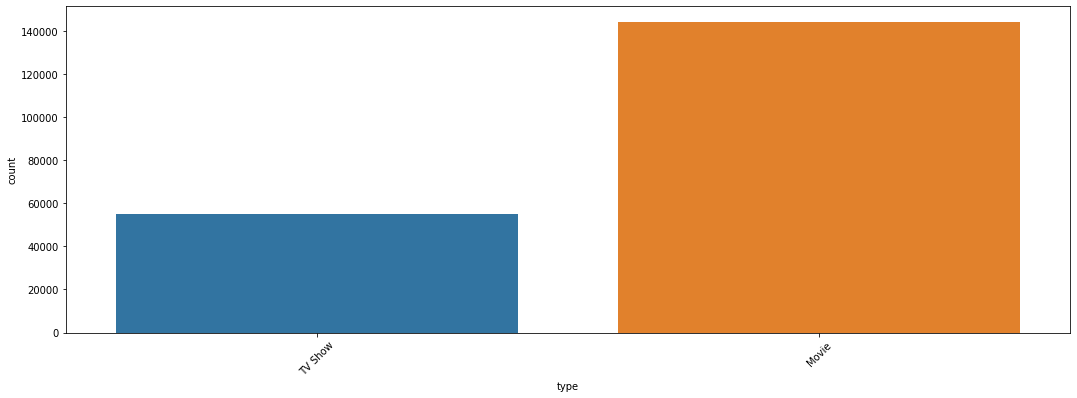

In [149]:
display_countplot(df, 'type', rot=True)

#### director:

In [152]:
display_normalized_value_counts(df[df["director"] != "Not Available"], 'director')

Martin Scorsese          0.28
Youssef Chahine          0.27
Cathy Garcia-Molina      0.24
Steven Spielberg         0.24
Lars von Trier           0.22
                         ... 
Jake Paltrow             0.00
Alphonso J. Wesson       0.00
Doesjka van Hoogdalem    0.00
Natalia Valdebenito      0.00
Keegan Kuhn              0.00
Name: director, Length: 4527, dtype: float64


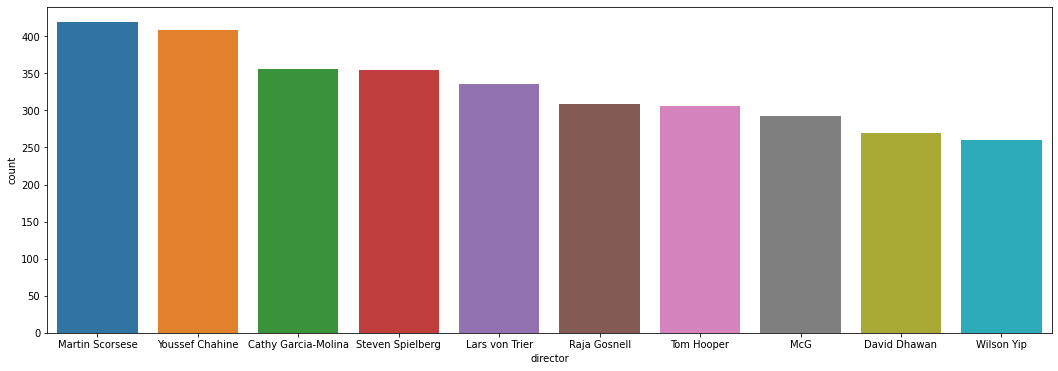

In [154]:
display_countplot_top_k_categories(df[df["director"] != "Not Available"], 'director', 10)

#### cast:

In [155]:
display_normalized_value_counts(df, 'cast')

Liam Neeson       0.08
Alfred Molina     0.08
John Krasinski    0.07
Salma Hayek       0.07
Frank Langella    0.06
                  ... 
Remy Munasifi     0.00
Kara Hayward      0.00
Sana Serrai       0.00
Richard Newman    0.00
Alice Taglioni    0.00
Name: cast, Length: 36392, dtype: float64


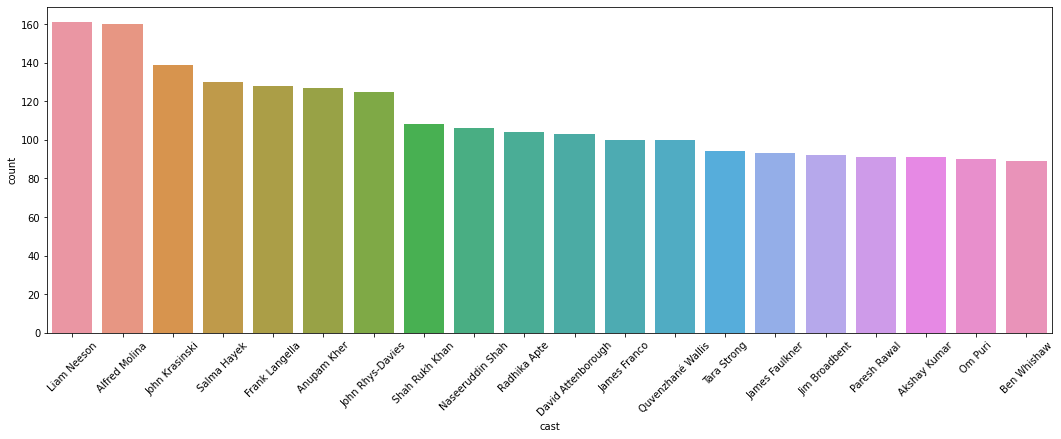

In [157]:
display_countplot_top_k_categories(df, 'cast', 20, rot=True)

#### country:

In [159]:
display_normalized_value_counts(df[df["country"] != "Not Available"], 'country')

United States     31.12
India             12.09
United Kingdom     6.75
Japan              4.56
France             4.35
                  ...  
Vatican City       0.00
Afghanistan        0.00
Panama             0.00
Sri Lanka          0.00
Nicaragua          0.00
Name: country, Length: 118, dtype: float64


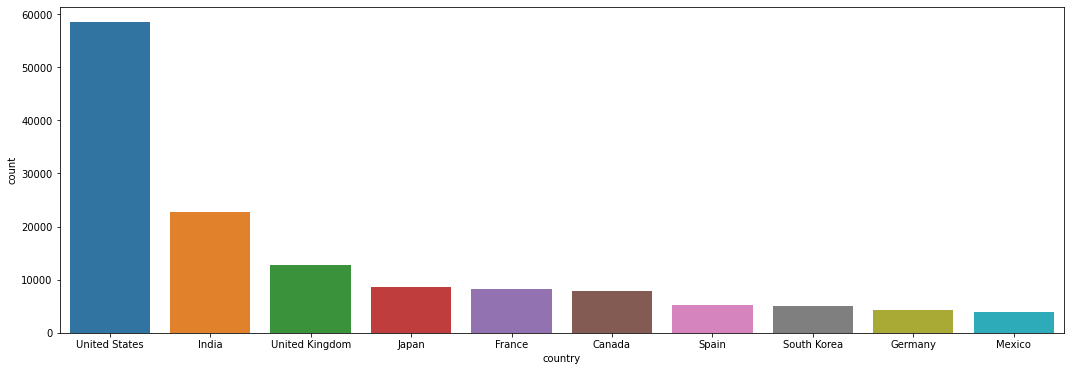

In [160]:
display_countplot_top_k_categories(df[df["country"] != "Not Available"], 'country', 10)

#### date_added:

In [161]:
display_normalized_value_counts(df, 'date_added')

2020-01-01    1.87
2019-11-01    1.13
2021-07-01    1.11
2017-10-01    0.94
2021-09-01    0.88
              ... 
2015-07-10    0.00
2015-06-29    0.00
2017-06-27    0.00
2019-03-26    0.00
2014-12-05    0.00
Name: date_added, Length: 1663, dtype: float64


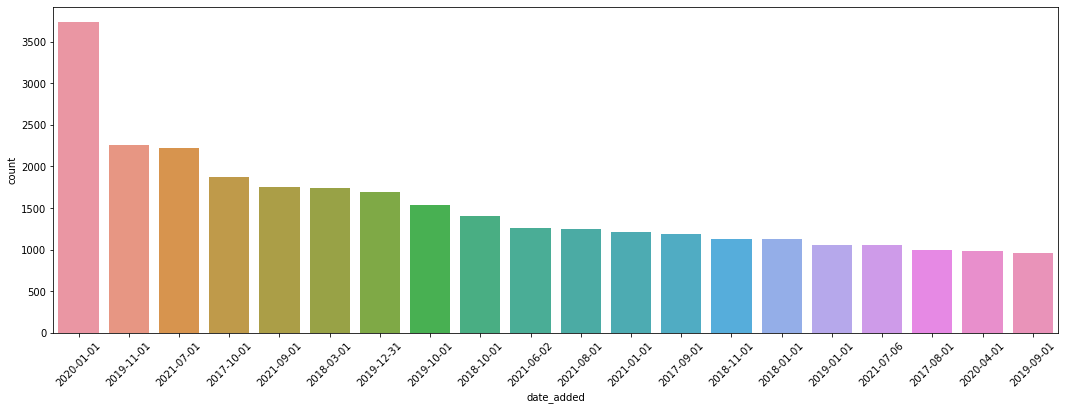

In [163]:
display_countplot_top_k_categories(df, 'date_added', 20, rot=True)

#### year_added:

In [164]:
display_normalized_value_counts(df, 'year_added')

2019    23.30
2020    22.87
2021    18.12
2018    17.73
2017    12.43
2016     4.19
2015     0.76
2014     0.22
2011     0.22
2013     0.10
2012     0.02
2009     0.02
2010     0.01
2008     0.01
Name: year_added, dtype: float64


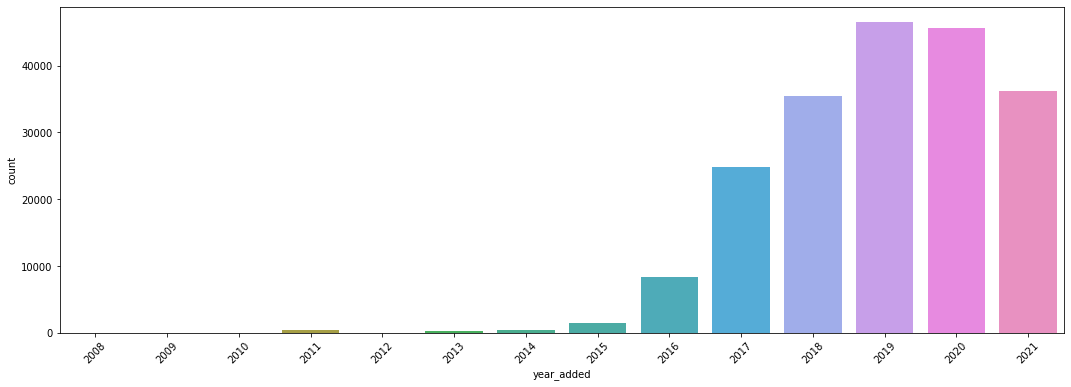

In [168]:
display_countplot(df, 'year_added', rot=True)

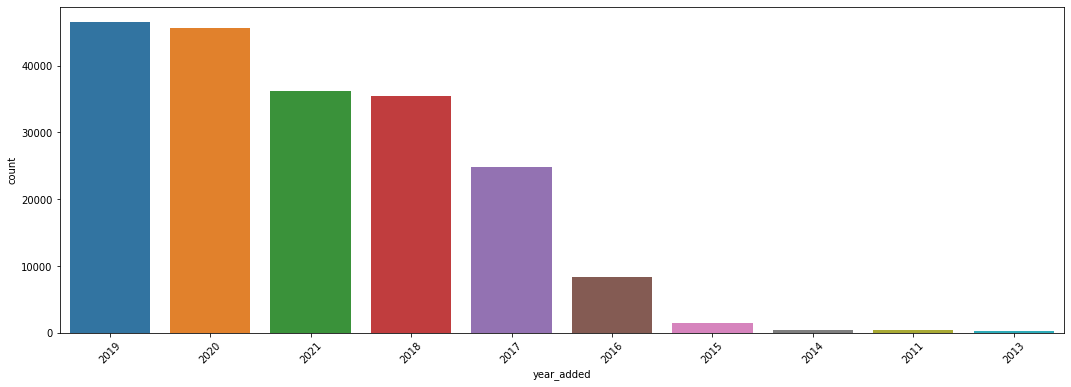

In [169]:
display_countplot_top_k_categories(df, 'year_added', 10, rot=True)

#### rating:

In [167]:
display_normalized_value_counts(df, 'rating')

TV-MA       36.53
TV-14       21.71
R           12.95
PG-13        8.12
TV-PG        7.29
PG           5.46
TV-Y7        3.13
TV-Y         1.81
TV-G         1.34
G            0.77
NR           0.74
NC-17        0.07
UR           0.04
TV-Y7-FV     0.04
Name: rating, dtype: float64


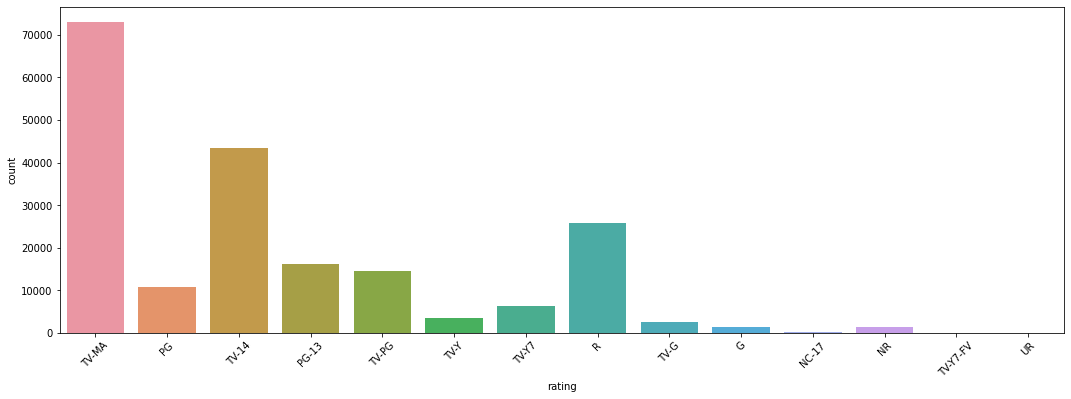

In [171]:
display_countplot(df, 'rating', rot=True)

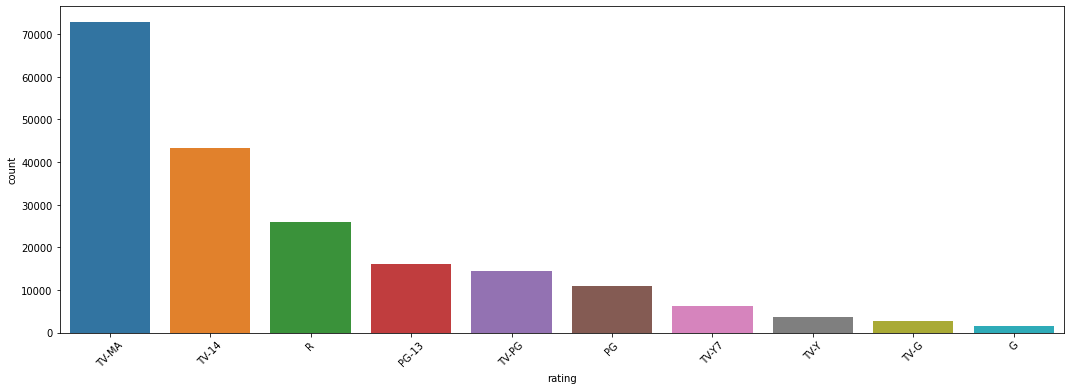

In [166]:
display_countplot_top_k_categories(df, 'rating', 10, rot=True)

#### listed_in:

In [172]:
display_normalized_value_counts(df, 'listed_in')

Dramas                          14.90
International Movies            13.96
Comedies                        10.43
International TV Shows           6.36
Action & Adventure               6.12
Independent Movies               4.92
Children & Family Movies         4.87
TV Dramas                        4.47
Thrillers                        3.56
Romantic Movies                  3.21
TV Comedies                      2.45
Crime TV Shows                   2.32
Horror Movies                    2.29
Kids' TV                         2.26
Sci-Fi & Fantasy                 2.02
Romantic TV Shows                1.52
Music & Musicals                 1.52
TV Action & Adventure            1.14
Anime Series                     1.14
Spanish-Language TV Shows        1.05
British TV Shows                 0.88
Documentaries                    0.86
Sports Movies                    0.72
Classic Movies                   0.72
TV Mysteries                     0.64
Korean TV Shows                  0.56
Cult Movies 

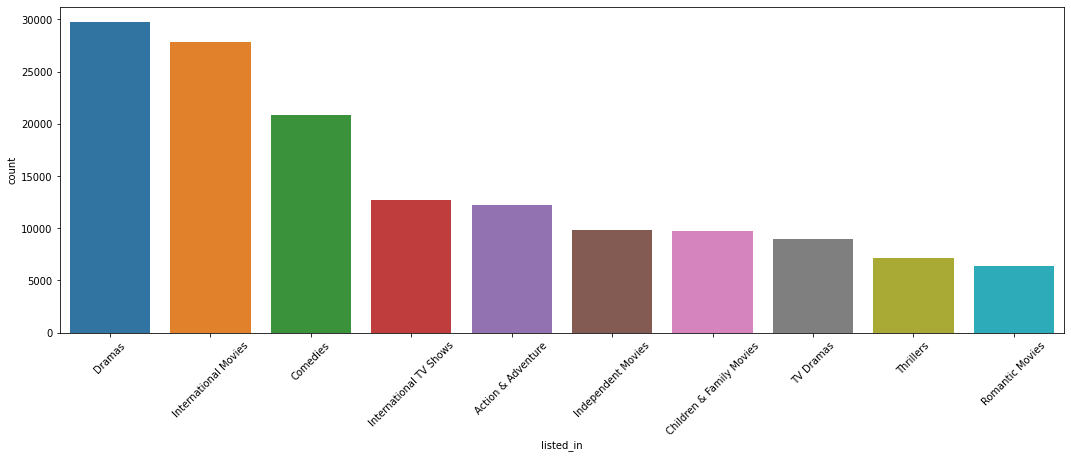

In [173]:
display_countplot_top_k_categories(df, 'listed_in', 10, rot=True)

#### duration_minutes:

In [183]:
df[df["duration_minutes"] != -1]['duration_minutes'].describe()

count    144448.000000
mean        107.096249
std          24.574679
min           8.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: duration_minutes, dtype: float64

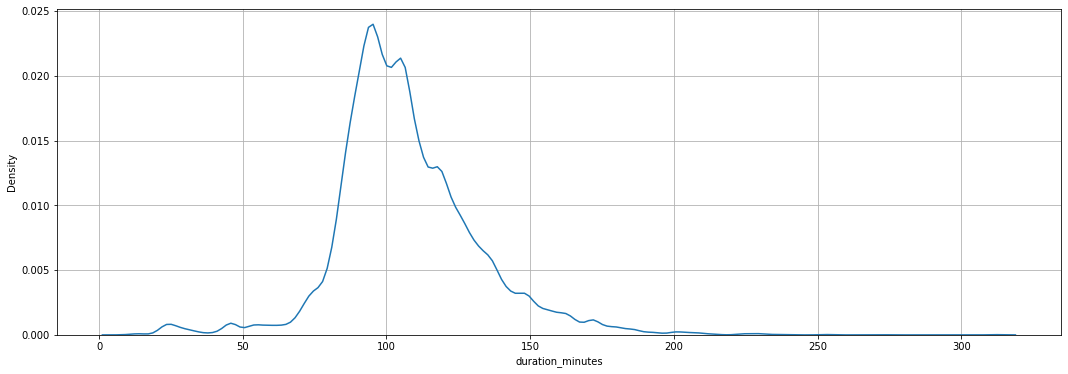

In [180]:
display_kde_plot(df[df["duration_minutes"] != -1], 'duration_minutes')

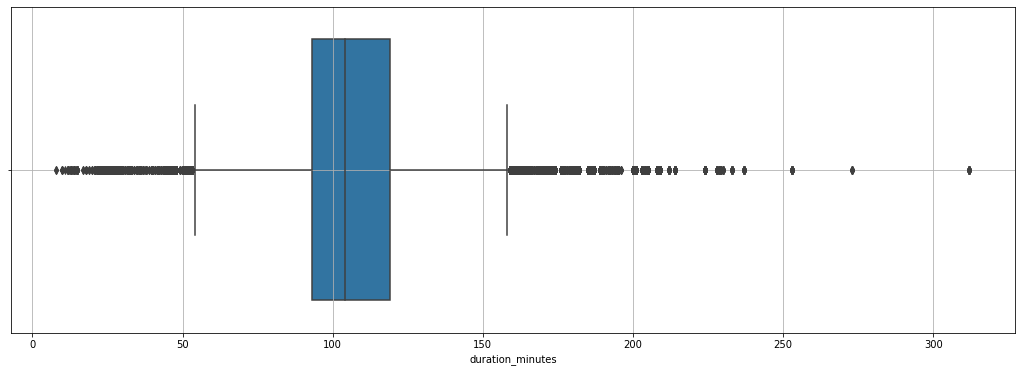

In [181]:
display_box_plot(df[df["duration_minutes"] != -1], 'duration_minutes')

#### duration_seasons:

In [184]:
df[df["duration_seasons"] != -1]['duration_seasons'].describe()

count    20813.000000
mean         3.458319
std          2.188339
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         17.000000
Name: duration_seasons, dtype: float64

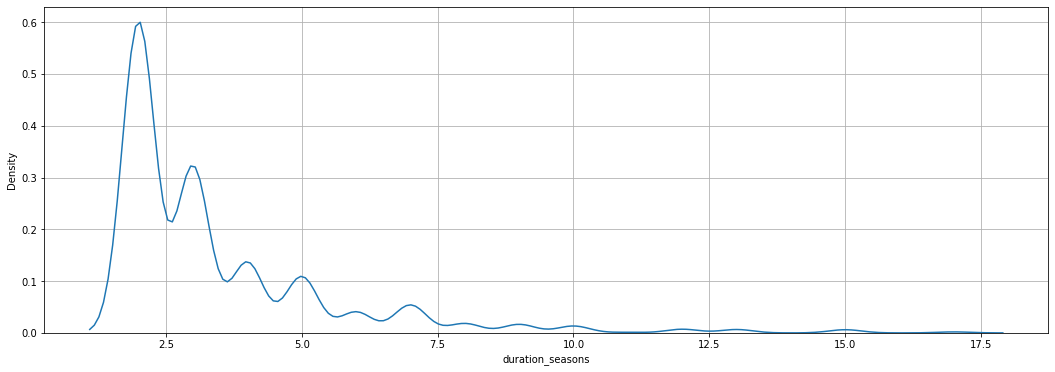

In [185]:
display_kde_plot(df[df["duration_seasons"] != -1], 'duration_seasons')

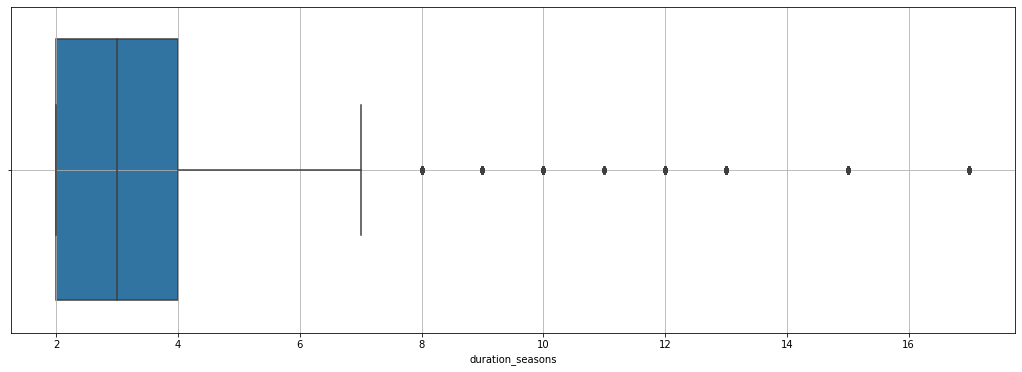

In [186]:
display_box_plot(df[df["duration_seasons"] != -1], 'duration_seasons')

## Bivariate Analysis:

In [190]:
plt.rcParams["figure.figsize"] = (18,6)

In [191]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'year_added', 'release_year', 'rating', 'listed_in', 'duration_minutes',
       'duration_seasons'],
      dtype='object')

#### 'type' vs 'duration_minutes':

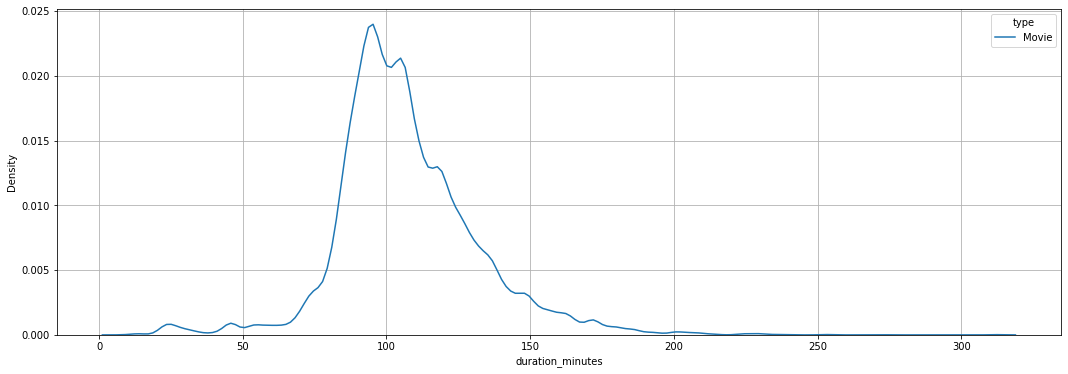

In [196]:
display_kde_plot_with_hue(df[df["type"] == "Movie"], 'duration_minutes', 'type')

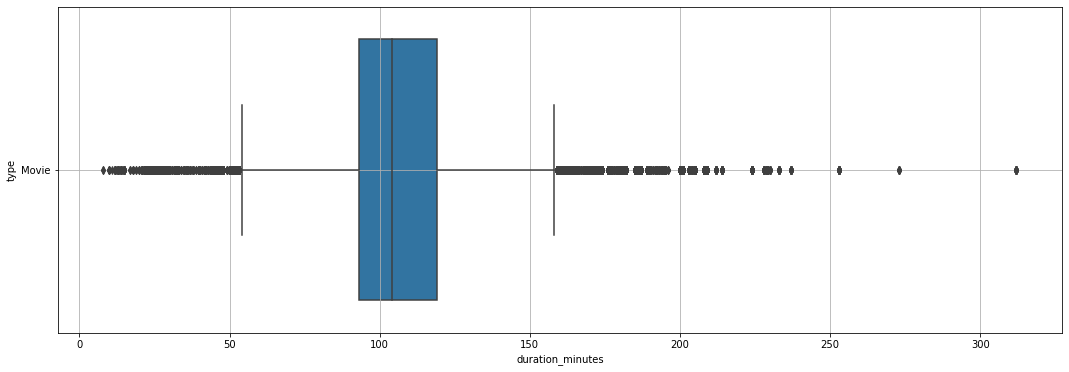

In [197]:
display_box_plot_2d(df[df["type"] == "Movie"],'duration_minutes', 'type')

#### 'type' vs 'duration_seasons':

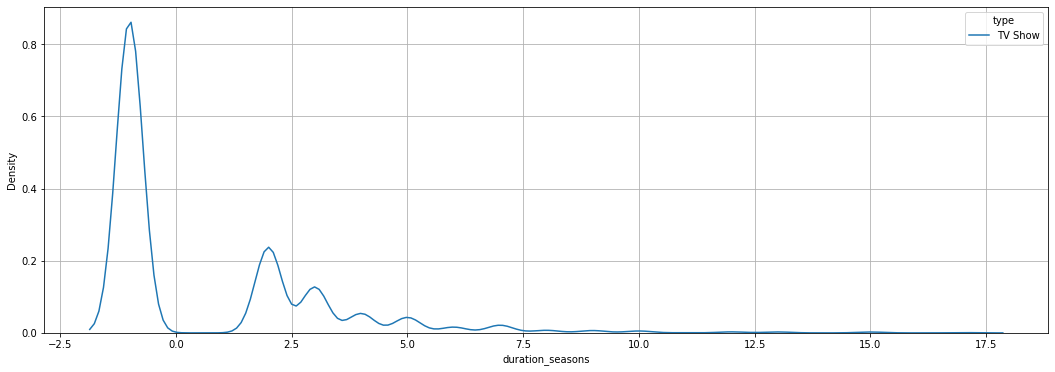

In [203]:
display_kde_plot_with_hue(df[df["type"] == "TV Show"], 'duration_seasons', 'type')

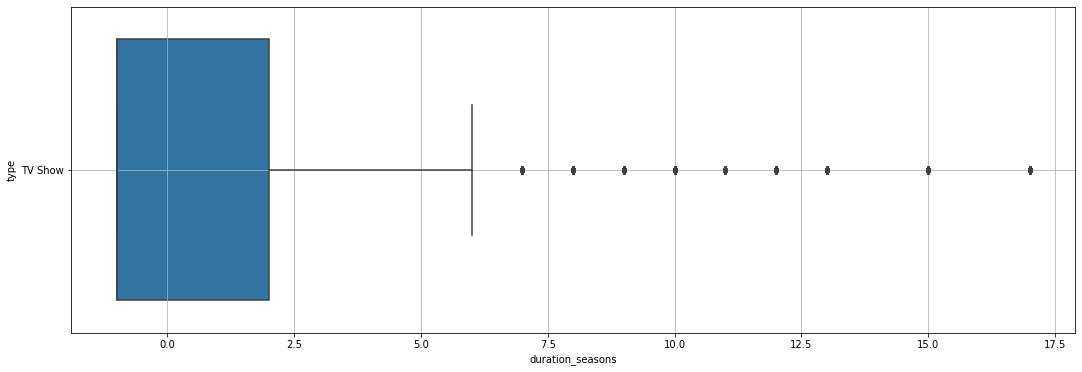

In [204]:
display_box_plot_2d(df[df["type"] == "TV Show"],'duration_seasons', 'type')

#### 'year_added' vs 'release_year':

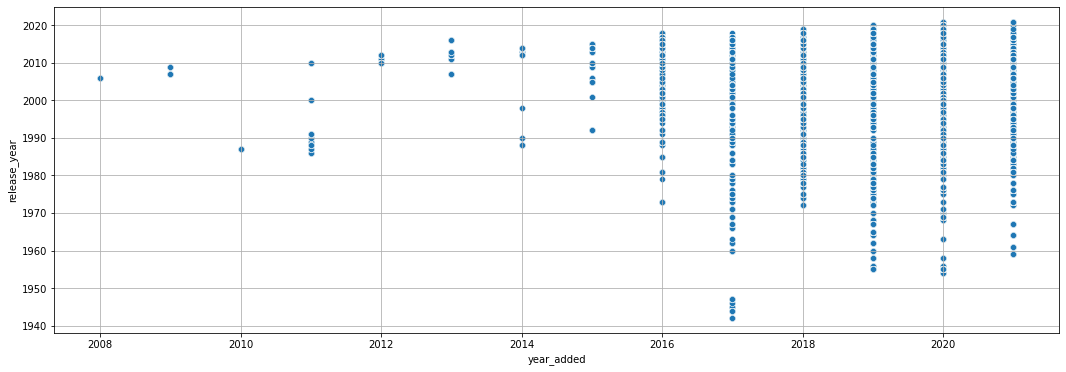

In [207]:
display_scatter_plot(df, "year_added", "release_year")

In [208]:
display_pearson_corr_coef(df, "year_added", "release_year")

PCC between 'year_added' and 'release_year' = 0.051


In [209]:
display_spearman_rank_corr_coef(df, "year_added", "release_year")

SRCC between 'year_added' and 'release_year' = 0.263


#### 'country' vs 'rating':

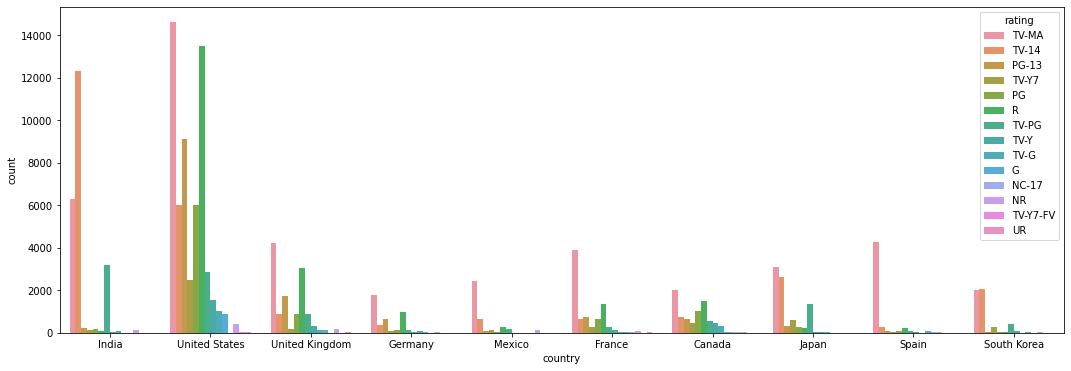

In [224]:
df_temp = df[df["country"] != "Not Available"]
top_k_countries = df_temp['country'].value_counts().nlargest(10).index
filtered_df = df[df['country'].isin(top_k_countries)]

plt.rcParams["figure.figsize"] = (18,6)
display_countplot_with_hue(filtered_df, 'country', 'rating')

#### 'listed_in' vs 'rating':

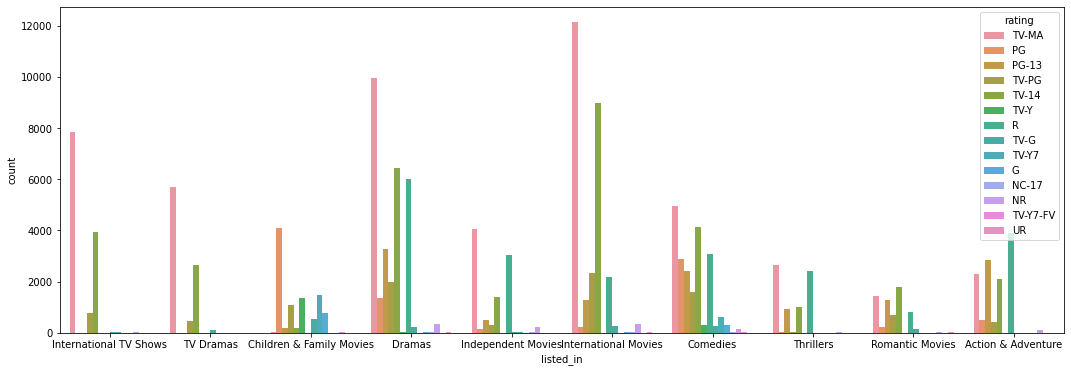

In [225]:
top_k_listed_ins = df['listed_in'].value_counts().nlargest(10).index
filtered_df = df[df['listed_in'].isin(top_k_listed_ins)]

plt.rcParams["figure.figsize"] = (18,6)
display_countplot_with_hue(filtered_df, 'listed_in', 'rating')

#### 'director' vs 'rating':

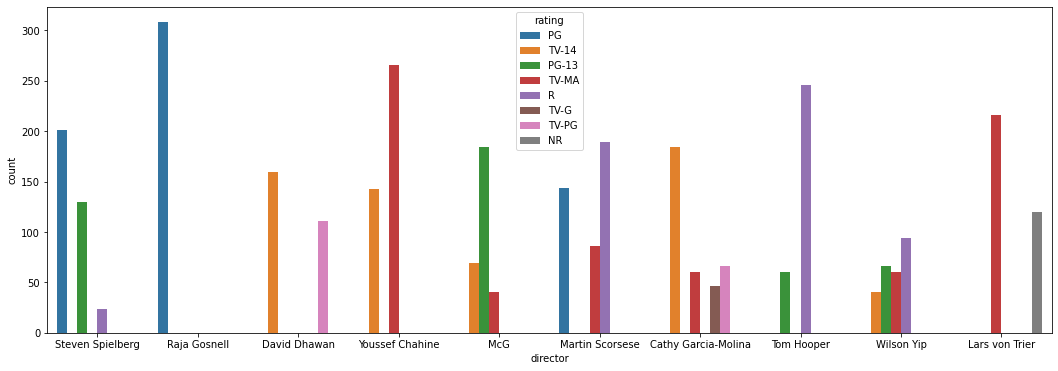

In [227]:
df_temp = df[df["director"] != "Not Available"]
top_k_directors = df_temp['director'].value_counts().nlargest(10).index
filtered_df = df_temp[df_temp['director'].isin(top_k_directors)]

plt.rcParams["figure.figsize"] = (18,6)
display_countplot_with_hue(filtered_df, 'director', 'rating')

#### 'duration_minutes' vs 'rating':

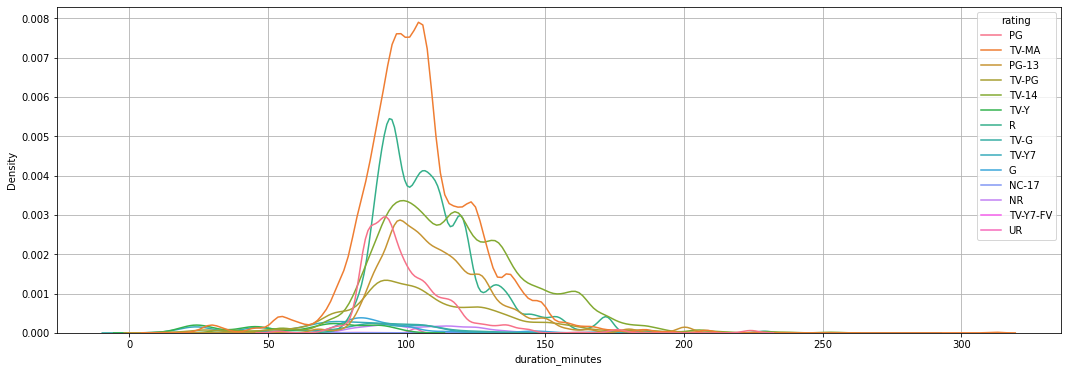

In [236]:
display_kde_plot_with_hue(df[df["duration_minutes"] != -1], 'duration_minutes', 'rating')

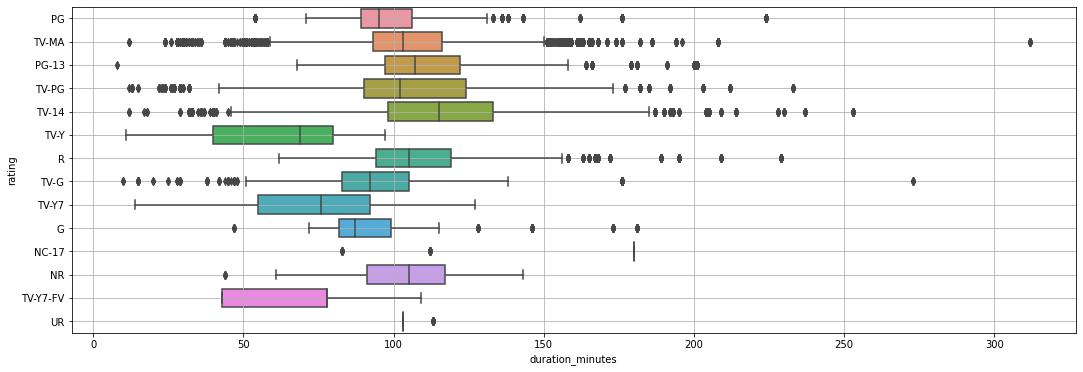

In [237]:
display_box_plot_2d(df[df["duration_minutes"] != -1],'duration_minutes', 'rating')

#### 'duration_seasons' vs 'rating':

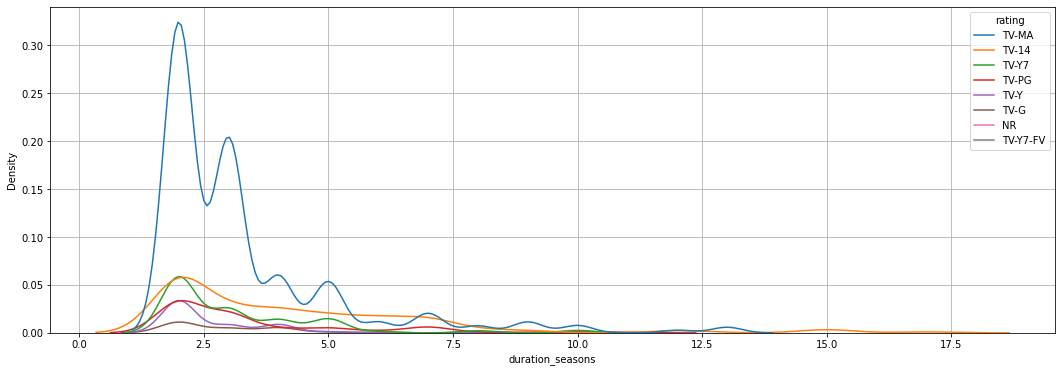

In [238]:
display_kde_plot_with_hue(df[df["duration_seasons"] != -1], 'duration_seasons', 'rating')

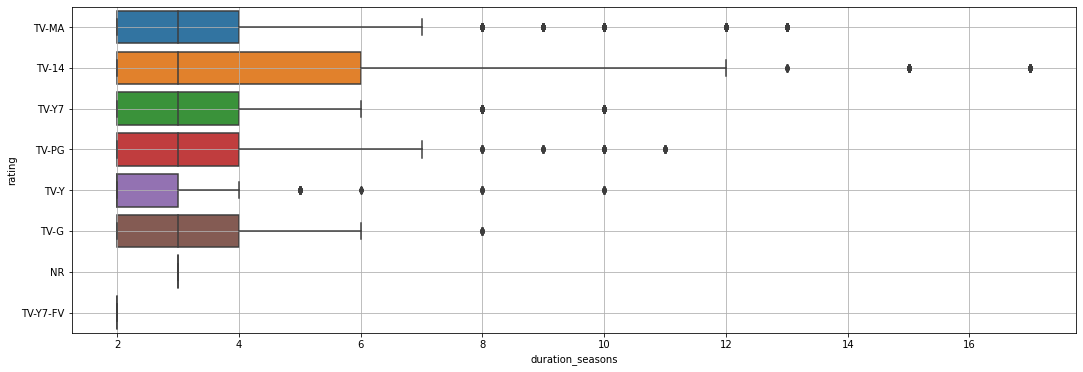

In [239]:
display_box_plot_2d(df[df["duration_seasons"] != -1],'duration_seasons', 'rating')

## Correlation Heatmap:

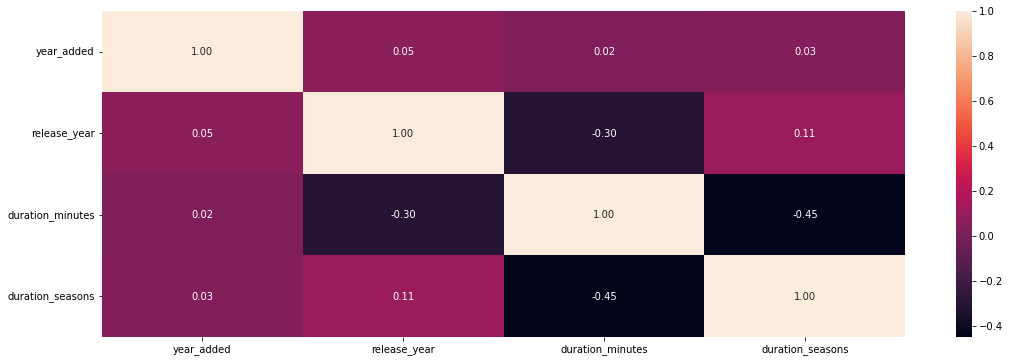

In [241]:
display_correlation_plot(df)